In [4]:
#Import Dependencies
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import folium

In [ ]:
#DATA PREPARATION

# Verificar valores nulos en cada columna
print(df.isnull().sum())

# Eliminar filas con valores nulos en columnas esenciales (ejemplo: 'LAT' y 'LON' para análisis de ubicación)
df = df.dropna(subset=['LAT', 'LON'])

# Eliminar espacios adicionales y convertir a mayúsculas para estandarizar texto en 'Vict Sex' y 'Vict Descent'
df['Vict Sex'] = df['Vict Sex'].str.strip().str.upper()
df['Vict Descent'] = df['Vict Descent'].str.strip().str.upper()

# Eliminar filas duplicadas basadas en todas las columnas
df = df.drop_duplicates()

In [5]:
#Punto 1 Read CSV File
df = pd.read_csv('LACrimesData.csv',low_memory=False)
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130.0,7.0,Wilshire,784.0,1.0,510.0,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800.0,1.0,Central,182.0,1.0,330.0,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700.0,3.0,Southwest,356.0,1.0,480.0,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037.0,9.0,Van Nuys,964.0,1.0,343.0,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200.0,6.0,Hollywood,666.0,2.0,354.0,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [22]:
#Punto 2 Filter CRM CD 1 with a list of crimes

# Filtro de delitos graves
codigos_graves = [110, 510, 330, 480, 343, 354]
delitos_graves = df[df['Crm Cd 1'].isin(codigos_graves)]

# Mostrar los delitos graves en una tabla
print("DELITOS GRAVES")
display(delitos_graves.head())

# Filtro de incidentes en lugares específicos
lugares_especificos = ['STREET', 'SIDEWALK', 'PARK']
incidentes_lugar = df[df['Premis Desc'].isin(lugares_especificos)]

# Mostrar los incidentes en lugares específicos en una tabla
print("INCIDENTE AREA")
display(incidentes_lugar.head())


DELITOS GRAVES


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,2020-03-01,2130.0,7.0,Wilshire,784.0,1.0,510.0,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,2020-02-08,1800.0,1.0,Central,182.0,1.0,330.0,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,2020-11-04,1700.0,3.0,Southwest,356.0,1.0,480.0,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,2020-03-10,2037.0,9.0,Van Nuys,964.0,1.0,343.0,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,2020-08-17,1200.0,6.0,Hollywood,666.0,2.0,354.0,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


INCIDENTE AREA


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,2020-03-01,2130.0,7.0,Wilshire,784.0,1.0,510.0,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
4,220614831,08/18/2022 12:00:00 AM,2020-08-17,1200.0,6.0,Hollywood,666.0,2.0,354.0,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277
13,221008844,05/06/2022 12:00:00 AM,2020-11-01,130.0,10.0,West Valley,1029.0,1.0,510.0,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,VALJEAN ST,VANOWEN AV,34.1939,-118.4859
17,210705560,11/27/2020 12:00:00 AM,2020-11-27,1800.0,7.0,Wilshire,776.0,1.0,230.0,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,AA,Adult Arrest,230.0,NaN,NaN,NaN,4500 LOMITA ST,NaN,34.0452,-118.3351
23,200412582,09/09/2020 12:00:00 AM,2020-09-09,630.0,4.0,Hollenbeck,413.0,1.0,510.0,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


In [24]:
#Punto 3 Count crimes by area
# Contar el número de incidentes por área
incidentes_por_area = df.groupby('AREA').size()

# Mostrar los resultados
print(incidentes_por_area)


AREA
1.0     19105
2.0     14444
3.0     17607
4.0     12389
5.0     13911
6.0     16959
7.0     14788
8.0     14874
9.0     13756
10.0    12906
11.0    13799
12.0    20714
13.0    15704
14.0    18926
15.0    16374
16.0    11146
17.0    12689
18.0    16850
19.0    13219
20.0    15810
21.0    13007
dtype: int64


In [9]:
#Punto 4 Count incidents by genre 
delitos_por_genero = df['Vict Sex'].value_counts()

# Mostrar los resultados
print(delitos_por_genero)

Vict Sex
M    135229
F    116328
X     25786
H        34
Name: count, dtype: int64


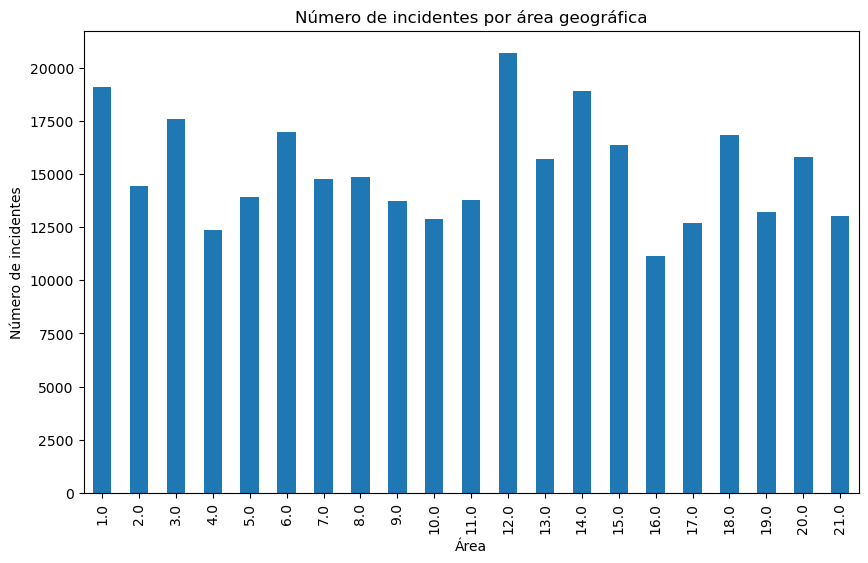

In [14]:
#Punto 4 Visualization of Distribution of incidents by area

# Agrupar por área y contar el número de incidentes
incidentes_por_area = df.groupby('AREA').size()

# Crear el gráfico de barras
incidentes_por_area.plot(kind='bar', figsize=(10, 6))
plt.title('Número de incidentes por área geográfica')
plt.xlabel('Área')
plt.ylabel('Número de incidentes')
plt.show()


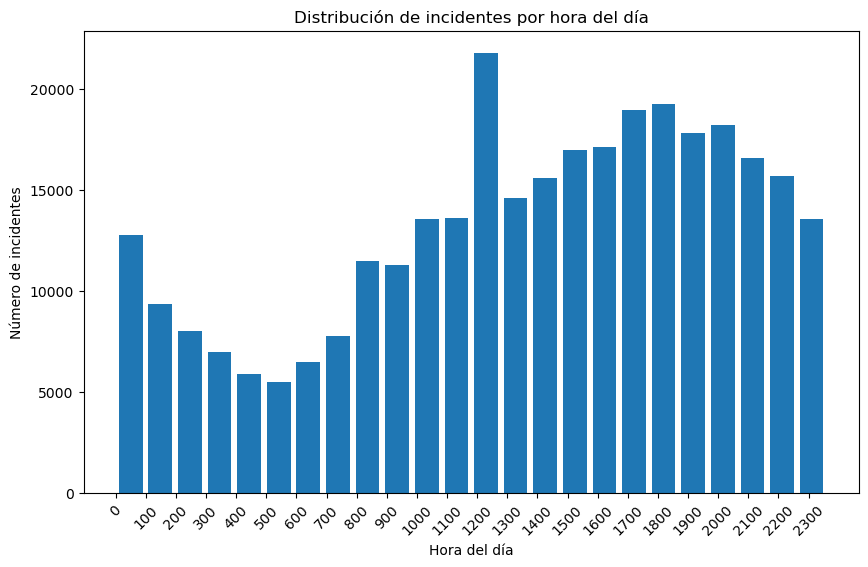

In [28]:
# Convertir 'TIME OCC' en un rango de 24 horas (asegurarte de que esté en formato numérico)
df['TIME OCC'] = pd.to_numeric(df['TIME OCC'], errors='coerce')

# Crear el histograma
plt.figure(figsize=(10, 6))
df['TIME OCC'].plot(kind='hist', bins=24, rwidth=0.8)
plt.title('Distribución de incidentes por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Número de incidentes')
plt.xticks(range(0, 2400, 100), rotation=45)  # Escalar en formato de 24 horas
plt.show()

In [ ]:
#Punto 6 Create Map from lat and lon

# Crear el mapa centrado en Los Ángeles
m = folium.Map(location=[34.0522, -118.2437], zoom_start=10)

# Agregar los puntos al mapa
for _, row in df.iterrows():
    folium.CircleMarker(
        location=(row['LAT'], row['LON']),
        radius=3,
        color='red'
    ).add_to(m)

# Guardar el mapa en un archivo HTML
m.save("mapa_incidentes.html")

In [26]:
#Punto 7 Filter colums with dates formates

# Verificar el rango de fechas en la columna DATE OCC

print("FECHAS PARA PODER FILTRAR")
print("Fecha mínima:", df['DATE OCC'].min())
print("Fecha máxima:", df['DATE OCC'].max())
print("###########################")

df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

# Filtrar incidentes ocurridos entre el 01/01/2020 y el 31/03/2020
rango_fechas = (df['DATE OCC'] >= '2020-01-01') & (df['DATE OCC'] <= '2020-03-31')
incidentes_en_rango = df[rango_fechas]

# Mostrar los primeros 5 resultados
display(incidentes_en_rango.head())


FECHAS PARA PODER FILTRAR
Fecha mínima: 2020-01-01 00:00:00
Fecha máxima: 2021-12-31 00:00:00
###########################


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,2020-03-01,2130.0,7.0,Wilshire,784.0,1.0,510.0,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,2020-02-08,1800.0,1.0,Central,182.0,1.0,330.0,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
3,200907217,05/10/2023 12:00:00 AM,2020-03-10,2037.0,9.0,Van Nuys,964.0,1.0,343.0,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
12,230204214,01/05/2023 12:00:00 AM,2020-02-01,800.0,2.0,Rampart,201.0,2.0,812.0,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,...,IC,Invest Cont,812.0,860.0,NaN,NaN,900 N MARIPOSA AV,NaN,34.0868,-118.2991
14,230312288,06/01/2023 12:00:00 AM,2020-02-02,315.0,3.0,Southwest,391.0,2.0,354.0,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,4200 SANTO TOMAS DR,NaN,34.0103,-118.3456


In [10]:
# Punto 8 Frecuency by Weapon used
# Contar los incidentes según el código de arma utilizada
armas_utilizadas = df['Weapon Used Cd'].value_counts()

# Mostrar los resultados
print(armas_utilizadas)


Weapon Used Cd
400.0    61769
500.0    12049
511.0     8285
102.0     6752
109.0     2556
         ...  
300.0        2
125.0        1
121.0        1
123.0        1
119.0        1
Name: count, Length: 78, dtype: int64


In [27]:

# Punto 9 Most Commun Crimes
# Contar la frecuencia de cada tipo de delito según Crm Cd
delitos_comunes = df['Crm Cd'].value_counts()

# Mostrar los 10 delitos más comunes
display(delitos_comunes.head(10))


Crm Cd
510.0    34230
624.0    25441
740.0    20691
330.0    20523
310.0    19728
230.0    18840
440.0    17352
626.0    16968
354.0    15344
420.0    14387
Name: count, dtype: int64

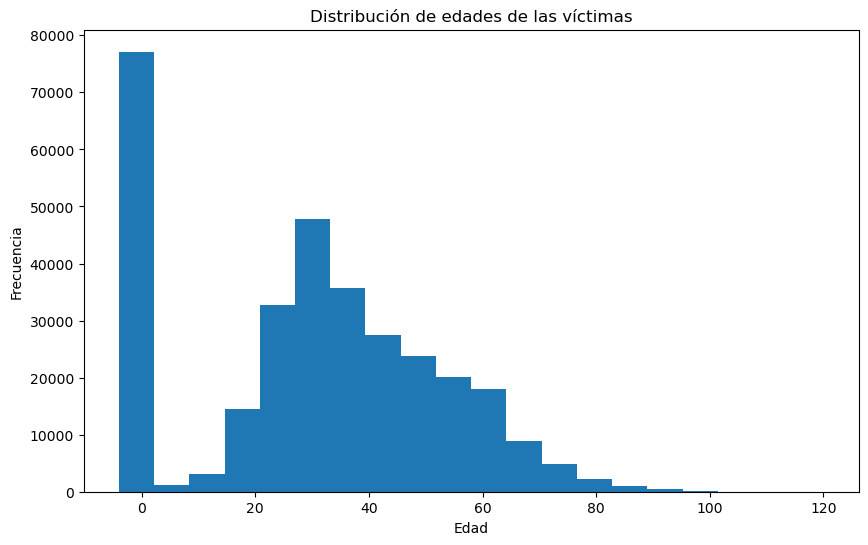

In [15]:
# Punto 10 Analisis age vic
# Convertir Vict Age a numérico, ignorando valores que no se pueden convertir
df['Vict Age'] = pd.to_numeric(df['Vict Age'], errors='coerce')

# Visualizar la distribución de las edades con un histograma
df['Vict Age'].plot(kind='hist', bins=20, figsize=(10, 6))
plt.title('Distribución de edades de las víctimas')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()
